## More Distributions and the Central Limit Theorem

It’s time to explore one of the most important probability distributions in statistics, normal distribution. You’ll create histograms to plot normal distributions and gain an understanding of the central limit theorem, before expanding your knowledge of statistical functions by adding the Poisson, exponential, and t-distributions to your repertoire.

### Distribution of Amir's sales
Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals As part of Amir's performance review, you want to be able to estimate the probability of him selling different amounts, but before you can do this, you'll need to determine what kind of distribution the amount variable follows.

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

product,client,status,amount,num_users
Product F,Current,Won,7389.52,19
Product C,New,Won,4493.01,43
Product B,New,Won,5738.09,87
Product I,Current,Won,2591.24,83
Product E,Current,Won,6622.97,17
Product B,New,Won,5496.27,2


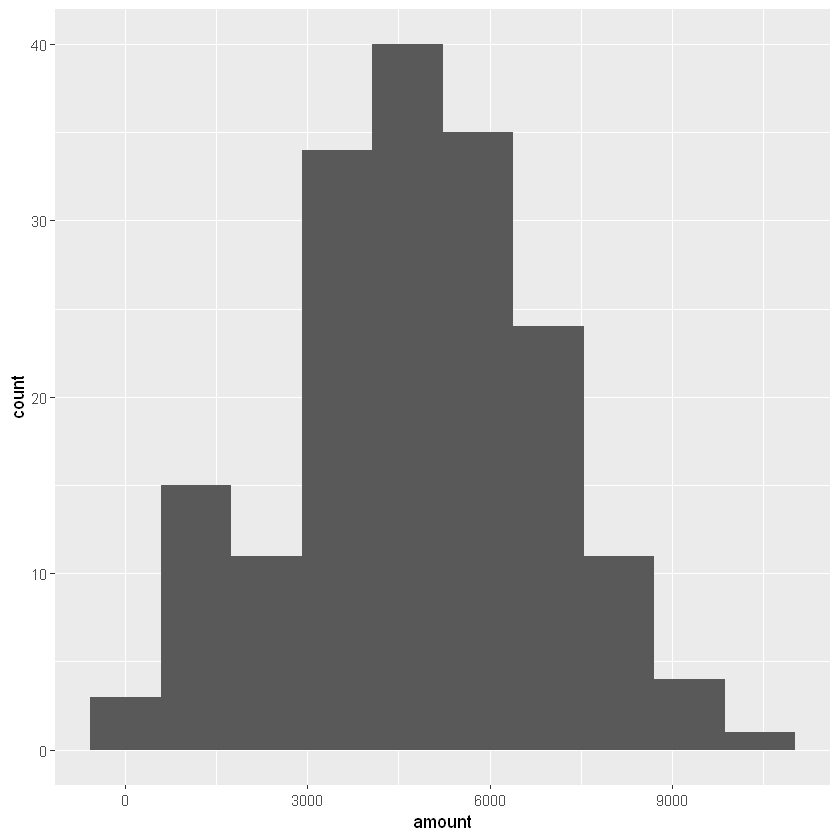

In [1]:
library(dplyr)
library(ggplot2)

sel <- readRDS("seller_1.rds")

head(sel)

# Histogram of amount with 10 bins
ggplot(sel, aes(x= amount)) + geom_histogram(bins = 10)

### Probabilities from the normal distribution
Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.

In [2]:
# Probability of deal < 7500
pnorm(7500, mean = 5000, sd = 2000)

[1] 0.8943502

In [3]:
# Probability of deal > 1000
1 - pnorm(1000, mean = 5000, sd = 2000)
# the same pnorm(1000, mean = 5000, sd = 2000, lower.tail = FALSE)

[1] 0.9772499

In [4]:
# Probability of deal between 3000 and 7000
pnorm(7000, mean = 5000, sd = 2000) - pnorm(3000, mean = 5000, sd = 2000)

[1] 0.6826895

In [5]:
# Calculate amount that 75% of deals will be more than
qnorm(0.75, 5000, 2000, lower.tail = FALSE)

[1] 3651.02

### Simulating sales under new market conditions
The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution and store these in the new_sales data frame, which has already been created for you.

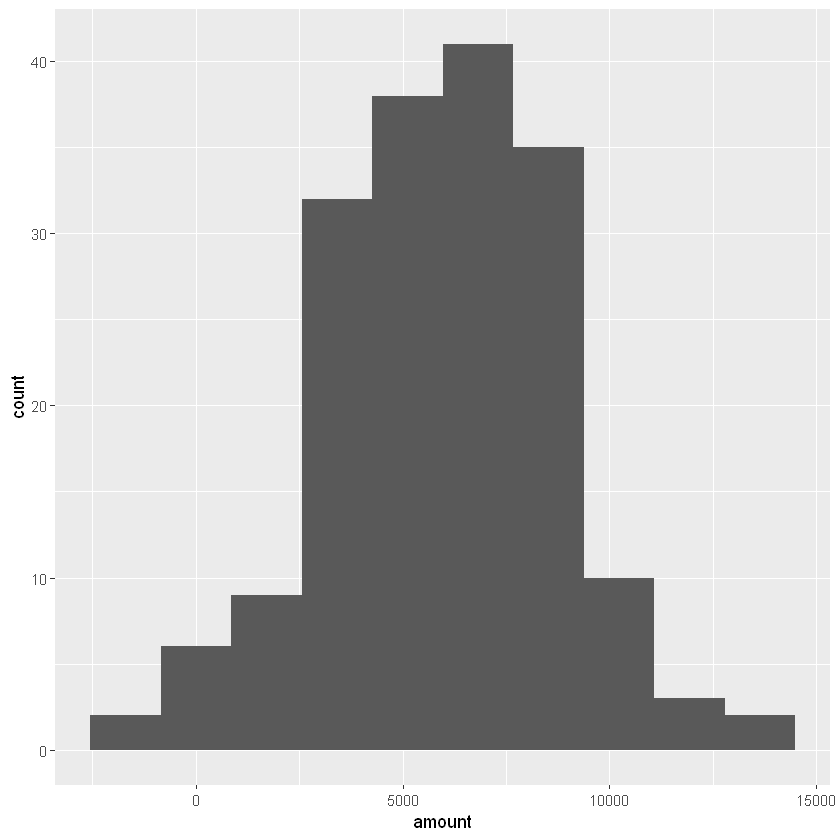

In [8]:
# Calculate new average amount
new_mean <- 1.2*5000

# Calculate new standard deviation
new_sd <- 1.3*2000

# Simulate 36 sales
new_sales <- sel %>% 
  mutate(amount = rnorm(178, mean = new_mean, sd = new_sd))

# Create histogram with 10 bins
ggplot(new_sales, aes(x= amount)) + geom_histogram(bins = 10)

### The CLT in action
The central limit theorem states that a sampling distribution of a sample statistic approaches the normal distribution as you take more samples, no matter the original distribution being sampled from.

In this exercise, you'll focus on the sample mean and see the central limit theorem in action while examining the num_users column of amir_deals more closely, which contains the number of people who intend to use the product Amir is selling.

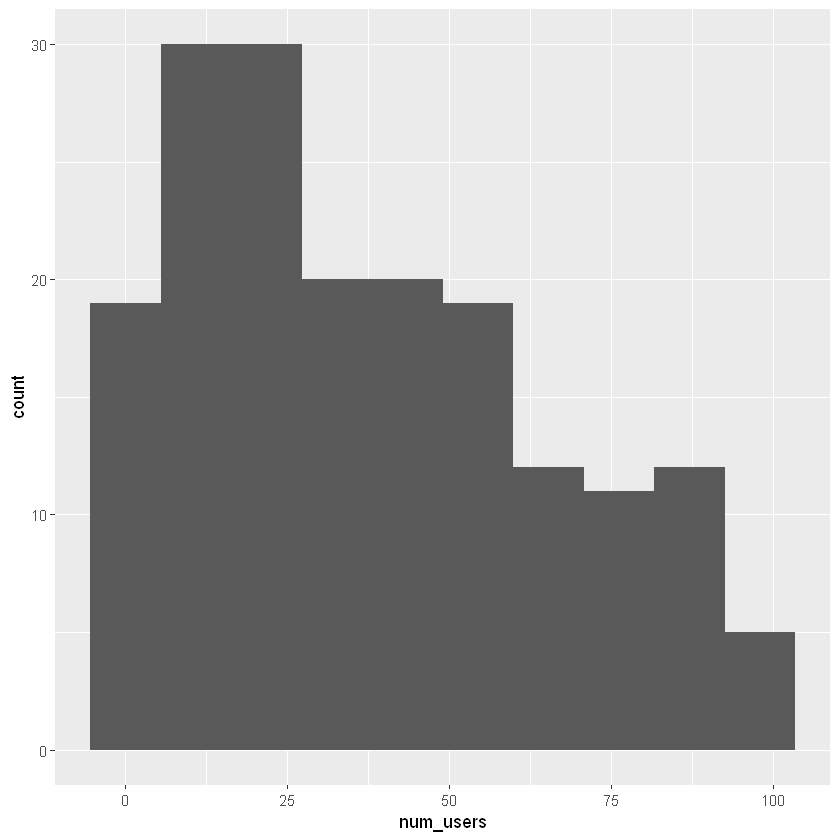

In [10]:
# Create a histogram of num_users
ggplot(sel, aes(num_users)) + geom_histogram(bins = 10)

In [15]:
# Set seed to 104
set.seed(104)

# Sample 20 num_users with replacement from amir_deals
sample(sel$num_users,20, replace = TRUE) %>%
  # Take mean
  mean()

[1] 30.35

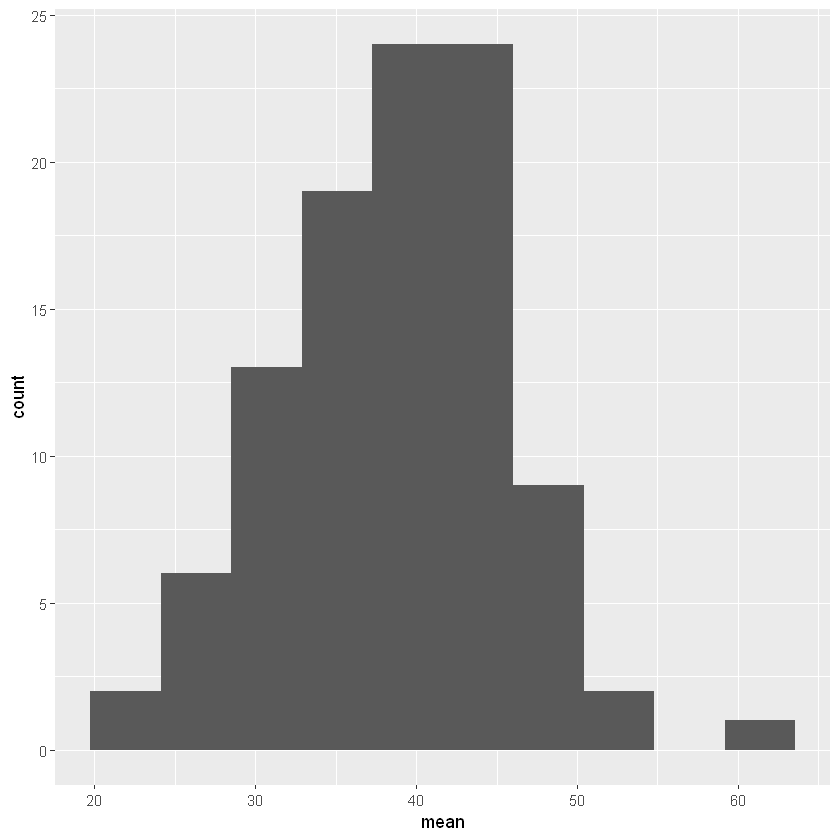

In [14]:
# Set seed to 104
set.seed(104)

# Sample 20 num_users from amir_deals and take mean
sample(amir_deals$num_users, size = 20, replace = TRUE) %>%
  mean()

# Repeat the above 100 times
sample_means <- replicate(100, sample(amir_deals$num_users, size = 20, replace = TRUE) %>% mean())

# Create data frame for plotting
samples <- data.frame(mean = sample_means)

# Histogram of sample means
ggplot(samples, aes(mean))+
  geom_histogram(bins = 10)

### The mean of means
You want to know what the average number of users (num_users) is per deal, but you want to know this number for the entire company so that you can see if Amir's deals have more or fewer users than the company's average deal. The problem is that over the past year, the company has worked on more than ten thousand deals, so it's not realistic to compile all the data. Instead, you'll estimate the mean by taking several random samples of deals, since this is much easier than collecting data from everyone in the company.

The user data for all the company's deals is available in all_deals.

In [18]:
all_deals = sel[, c("product", "num_users")]

# Set seed to 321
set.seed(321)

# Take 30 samples of 20 values of num_users, take mean of each sample
sample_means <- replicate(30, sample(all_deals$num_users, size = 20) %>% mean())

# Calculate mean of sample_means
mean(sample_means)
# Calculate mean of num_users in amir_deals
mean(sel$num_users)


[1] 38.205

[1] 37.65169

### Tracking lead responses
Your company uses sales software to keep track of new sales leads. It organizes them into a queue so that anyone can follow up on one when they have a bit of free time. Since the number of lead responses is a countable outcome over a period of time, this scenario corresponds to a Poisson distribution. On average, Amir responds to 4 leads each day. In this exercise, you'll calculate probabilities of Amir responding to different numbers of leads.

In [19]:
# What's the probability that Amir responds to 5 leads in a day, given that he responds to an average of 4?
dpois(5, lambda = 4)

[1] 0.1562935

In [20]:
 # Amir's coworker responds to an average of 5.5 leads per day. What is the probability that she answers 5 leads in a day?
dpois(5, lambda = 5.5)

[1] 0.1714007

In [21]:
# What's the probability that Amir responds to 2 or fewer leads in a day?
ppois(2, lambda = 4)

[1] 0.2381033

In [22]:
# What's the probability that Amir responds to more than 10 leads in a day?
ppois(10, lambda = 4, lower.tail = FALSE)

[1] 0.002839766

### Modeling time between leads
To further evaluate Amir's performance, you want to know how much time it takes him to respond to a lead after he opens it. On average, it takes 2.5 hours for him to respond. In this exercise, you'll calculate probabilities of different amounts of time passing between Amir receiving a lead and sending a response.

In [23]:
# Probability response takes < 1 hour
pexp(1, 1/2.5)

[1] 0.32968

In [24]:
# What's the probability it takes Amir more than 4 hours to respond to a lead?
pexp(4, 1/2.5, lower.tail = FALSE)

[1] 0.2018965

In [25]:
# What's the probability it takes Amir 3-4 hours to respond to a lead?
pexp(4, 1/2.5) - pexp(3, 1/2.5)

[1] 0.09929769